key:small, pos:420146, col:1150, ind:323

key:large, pos:32, col:28, ind:1

key:medium, pos:1875, col:538, ind:13

key:one, pos:20829, col:250, ind:6

posix, one:98.785867, small:99.650632, medium:77.287716, large:52.459016

col, one:1.185677, small:0.272758, medium:22.176422, large:45.901639



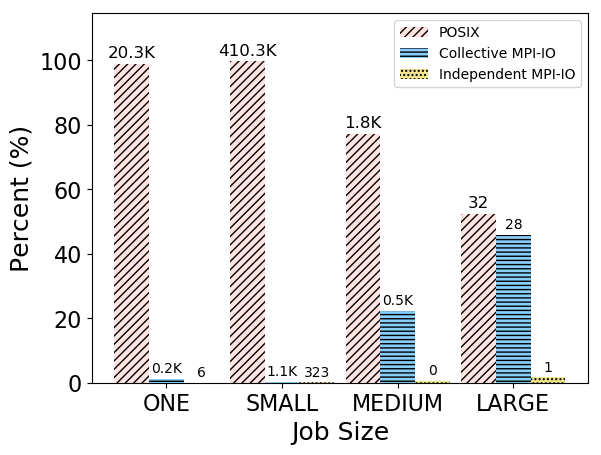

In [2]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import pickle


def plotIOType(io_dict):
    tot_one = io_dict["one"][0] + io_dict["one"][1] + io_dict["one"][2]
#    print "totone:%ld, pos:%ld\n"%(tot_one, io_dict["one"][0])
    tot_small = io_dict["small"][0] + io_dict["small"][1] + io_dict["small"][2]
    tot_medium = io_dict["medium"][0] + io_dict["medium"][1] + io_dict["medium"][2]
    tot_large = io_dict["large"][0] + io_dict["large"][1] + io_dict["large"][2]
    posix_percent = [float(io_dict["one"][0])/tot_one * 100, (float(io_dict["small"][0])/tot_small) * 100,\
                     float(io_dict["medium"][0]) * 100/tot_medium, float(io_dict["large"][0]) * 100/tot_large]
    posix_label = [str(round(float(io_dict["one"][0])/1024, 1))+"K", str(round(float(io_dict["small"][0])/1024, 1))+"K", str(round(float(io_dict["medium"][0])/1024, 1))+"K", \
                  str(int(io_dict["large"][0]))+""]
    print "posix, one:%lf, small:%lf, medium:%lf, large:%lf\n"%(posix_percent[0], posix_percent[1], \
                                                               posix_percent[2], posix_percent[3])
 #   print "posix label, one:%s, small:%s,medium:%s, large:%s\n"%(posix_label[0], posix_label[1], posix_label[2], posix_label[3])
    col_percent = [float(io_dict["one"][1])/tot_one * 100, (float(io_dict["small"][1])/tot_small) * 100,\
                     float(io_dict["medium"][1]) * 100/tot_medium, float(io_dict["large"][1]) * 100/tot_large]
    print "col, one:%lf, small:%lf, medium:%lf, large:%lf\n"%(col_percent[0], col_percent[1], \
                                                               col_percent[2], col_percent[3])
    
    col_label = [str(round(float(io_dict["one"][1])/1024, 1))+"K", str(round(float(io_dict["small"][1])/1024, 1))+"K", str(round(float(io_dict["medium"][1])/1024, 1))+"K", \
                  str(int(io_dict["large"][1]))]
 #   print "col label, one:%s, small:%s,medium:%s, large:%s\n"%(col_label[0], col_label[1], col_label[2], col_label[3])

    
    ind_percent = [float(io_dict["one"][2])/tot_one * 100, (float(io_dict["small"][2])/tot_small) * 100,\
                     float(io_dict["medium"][2]) * 100/tot_medium, float(io_dict["large"][2]) * 100/tot_large]
    ind_label = [str(int(io_dict["one"][2])), str(int(io_dict["small"][2])), str(int(io_dict["medium"][1])/1024), \
                  str(int(io_dict["large"][2]))]
 #   print "ind label, one:%s, small:%s,medium:%s, large:%s\n"%(ind_label[0], ind_label[1], ind_label[2], ind_label[3])
 #   print "ind, one:%lf, small:%lf, medium:%lf, large:%lf\n"%(col_percent[0], col_percent[1], \
                                                           #    col_percent[2], col_percent[3])
    ind = np.arange(4)
    fig, ax = plt.subplots()
    ax.set_xlabel('Job Size', fontsize = 18)
    ax.set_ylabel('Percent (%)', fontsize = 18)
    x = [0.3, 1.3, 2.3, 3.3]
    width = 0.30
    rect_pos = ax.bar(ind, posix_percent, width, color = 'mistyrose', label = "POSIX", hatch = "////")
    rect_col = ax.bar(ind + width, col_percent, width, color = 'lightskyblue', label = "Collective MPI-IO", hatch = "----")
    rect_ind = ax.bar(ind + width + width, ind_percent, width, color = 'khaki', label = "Independent MPI-IO", hatch = "....")
    ax.set_xticks(x)
    ax.set_xticklabels(("ONE", "SMALL", "MEDIUM", "LARGE"), fontsize = 16)
    ax.set_yticks((0, 20, 40, 60, 80, 100))
    ax.set_yticklabels((0, 20, 40, 60, 80, 100), fontsize = 16)
    
    for rect, label in zip(rect_pos, posix_label):
        height = rect.get_height()
        #print "x is %d, label:%s"%(rect.get_x(), label)
        ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
            ha='center', va='bottom', fontsize = 12, color = 'black')
        
    for rect, label in zip(rect_col, col_label):
        height = rect.get_height()
        #print "x is %d, label:%s"%(rect.get_x(), label)
        ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
            ha='center', va='bottom', fontsize = 10, color = 'black')
        
    for rect, label in zip(rect_ind, ind_label):
        height = rect.get_height()
        #print "x is %d, label:%s"%(rect.get_x(), label)
        ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
            ha='center', va='bottom', fontsize = 10, color = 'black')
    
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,y1, y2 + 10))
    title = "io_type"
    plt.legend()
#    plt.savefig(title+'.pdf', format = 'pdf', bbox_inches='tight')

    plt.show()
 
    
'''
x_pos = [1, 2, 4, 8, 16, 32, 64]
y_pos = [126, 71, 36, 21, 13, 7, 8]

plt.gcf().clear()
fig, ax = plt.subplots()
x = (1, 2, 3, 4, 5, 6, 7)
rects = ax.bar(x, y_pos, color = 'b')

ax.set_xlabel('Executor Count', fontsize = 18)
ax.set_ylabel('Time in Minutes', fontsize = 18)
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.set_title('Spark Timing')
ax.set_xticks(x)
#ax.set_yticks(labelsize = 18)
ax.set_xticklabels((1, 2, 4, 8, 16, 32, 64, 128))
ax.set_ylim(0, 150)
#ax.set_yticklabels(y_pos, fontsize = 18)
title = "spark_timing"
#plt.savefig(title+'.pdf', format = 'pdf', bbox_inches='tight')
labels = ["1x", "1.78x", "3.5x", "6x", "9.7x", "18x", "15.8x"]

    
'''

plot_path = "/global/cscratch1/sd/tengwang/cluster_plot/io_type.pkl"
save_fd = open(plot_path, 'rb')
out_dict = pickle.load(save_fd)
save_fd.close()

for key,value in out_dict.iteritems():
    print "key:%s, pos:%d, col:%d, ind:%d\n"%(key, value[0], value[1], value[2])

plotIOType(out_dict)


